We have many type of approximation_integration, but in this first version, we will focus only on using `Riemann_sum` and `Gauss-Legendre`.

In [1]:
from shutil import copyfile

cf = copyfile(src = "../input/nhan1212/approx_series.py", 
              dst = "../working/approx_series.py")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import approx_series as dvn_aps
import scipy.integrate as integrate

## 1. Reimann integration

$$ \int_{a}^{b} f(t) dt \approx \sum_{k=1}^n \left[ \dfrac{ f\left( c_k \right) - f\left(c_{k-1} \right) }{2} \times \left( c_k - c_{k-1} \right) \right]$$

where 

$$ \left \lbrace \begin{array}{ccl} c_0 &=& a \\ c_1 &=& a + \dfrac{b-a}{n} \\ \ldots \\ c_n &=& b \end{array} \right. $$

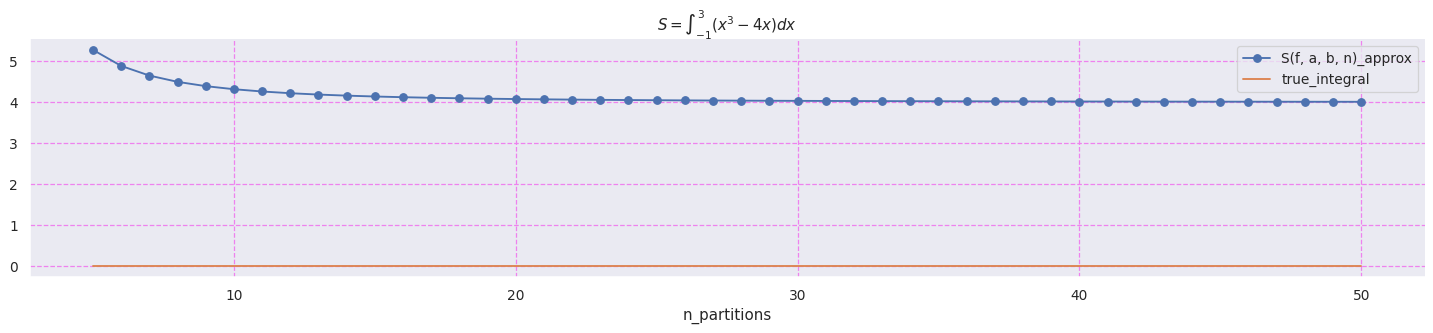

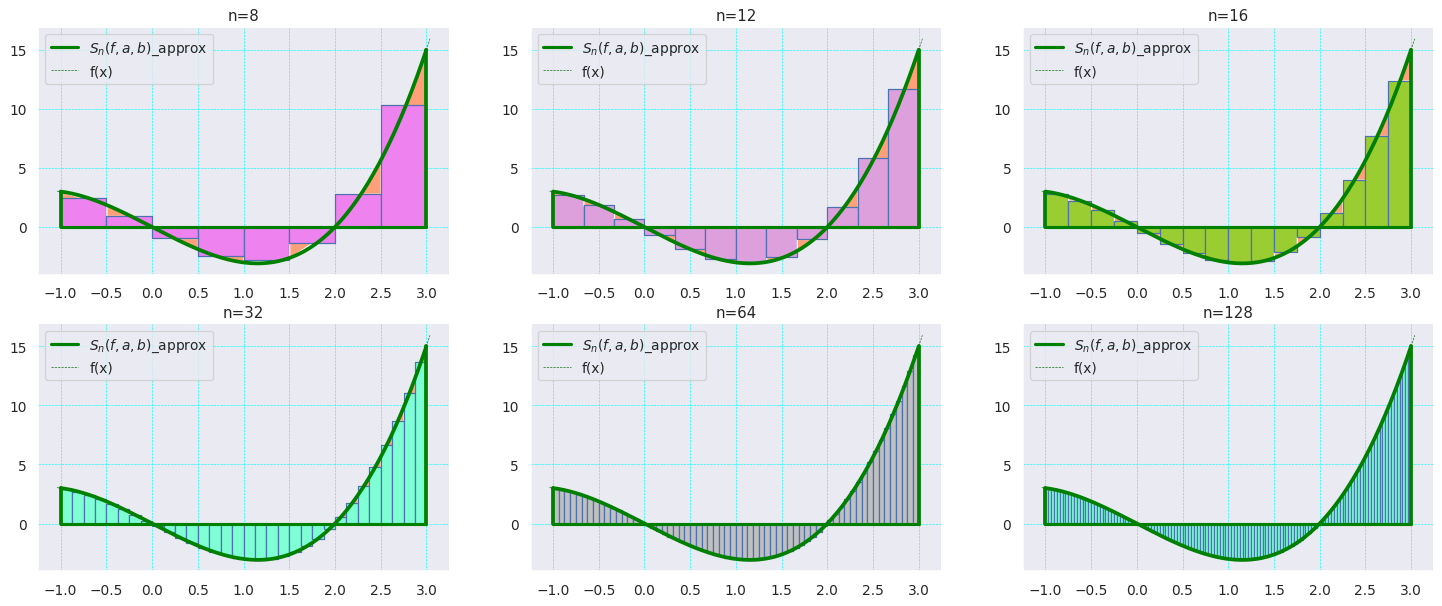

In [2]:
a = -1
b = 3

def fx(x): return (x**3 - 4*x)
    
dvn_aps.loss_integral_Riemann_sum(fx,a, b, 5, 50, '$S = \int_{-1}^3 (x^3-4x)dx$')    
colors = ["violet", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

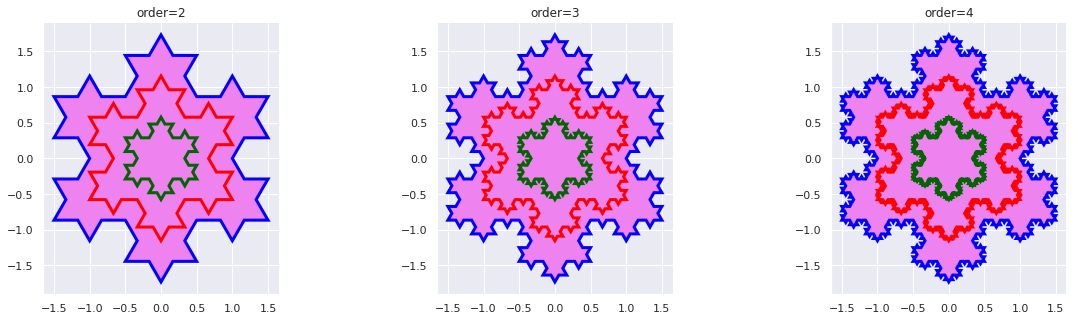

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5),
                             subplot_kw={'aspect': 'equal'})
ax = ax.ravel()
for k, n_od in enumerate([2,3,4]):
    for n, clr in list(zip([2,3,4], ['blue', "red", "darkgreen"])):
        x, y = dvn_aps.koch_snowflake(order=n_od, scale=5-n)
        ax[k].fill(x, y, facecolor='violet', edgecolor=clr, linewidth=3)
        ax[k].set_title("order={}".format(n_od))

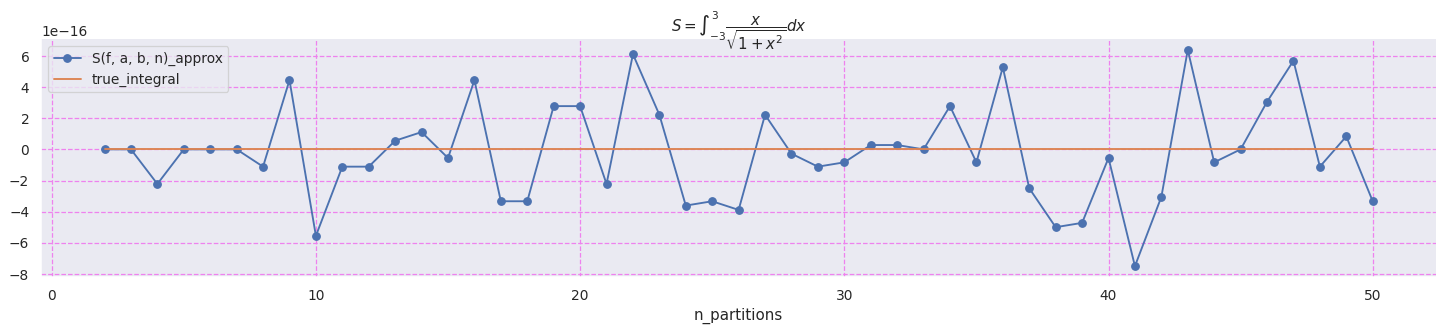

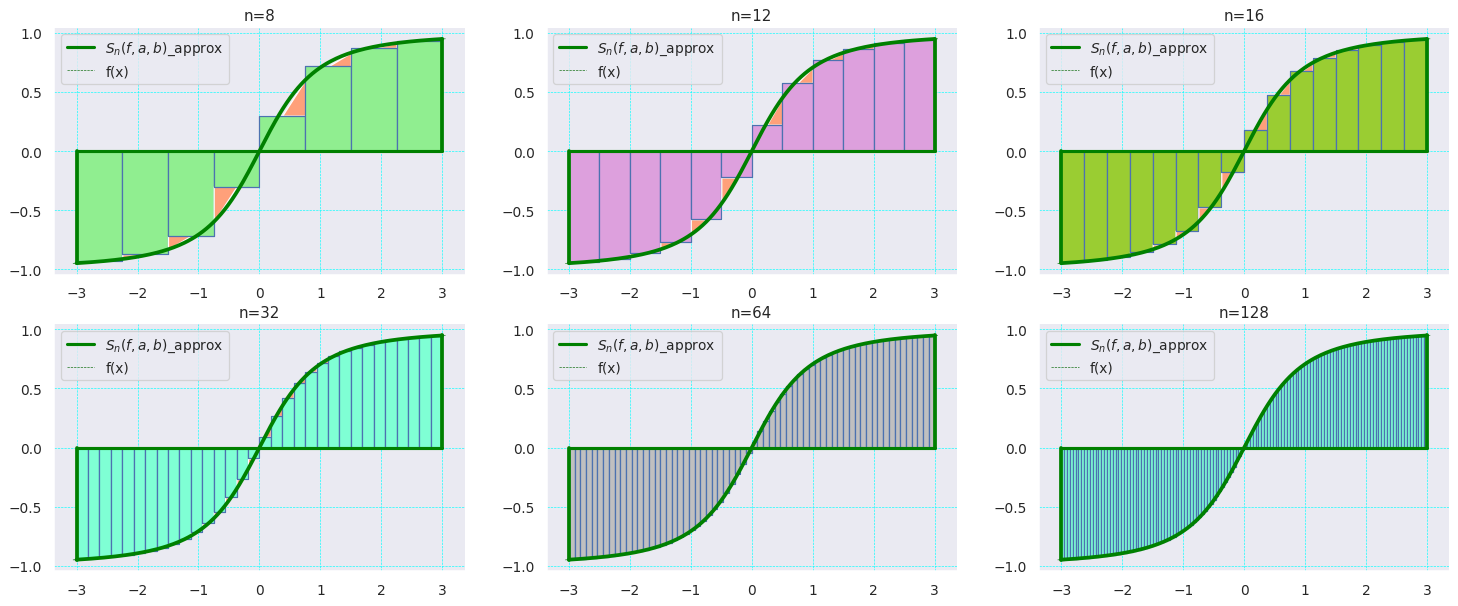

In [4]:
a = -3
b = 3

def fx(x): return x/np.sqrt(1+x**2)

dvn_aps.loss_integral_Riemann_sum(fx,a, b, 2, 50, '$S = \int_{-3}^3 \dfrac{x}{\sqrt{1+x^2}} dx$')    
colors = ["lightgreen", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

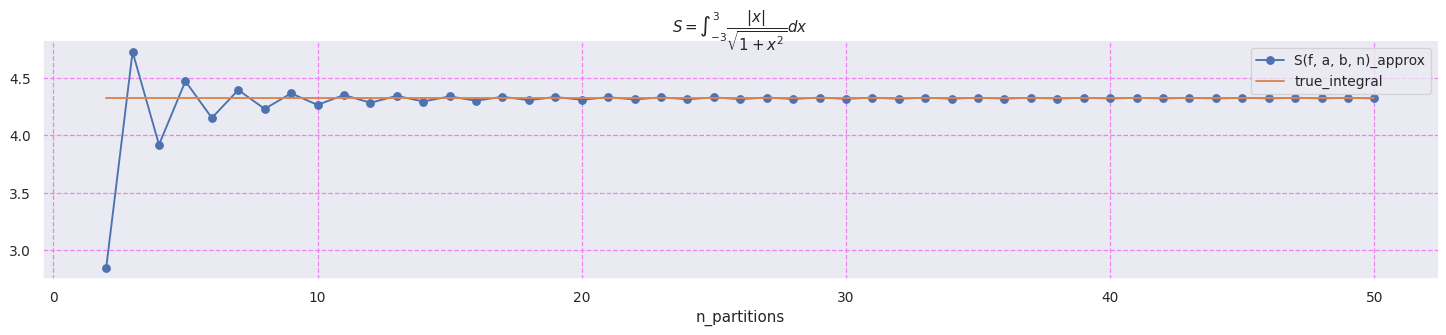

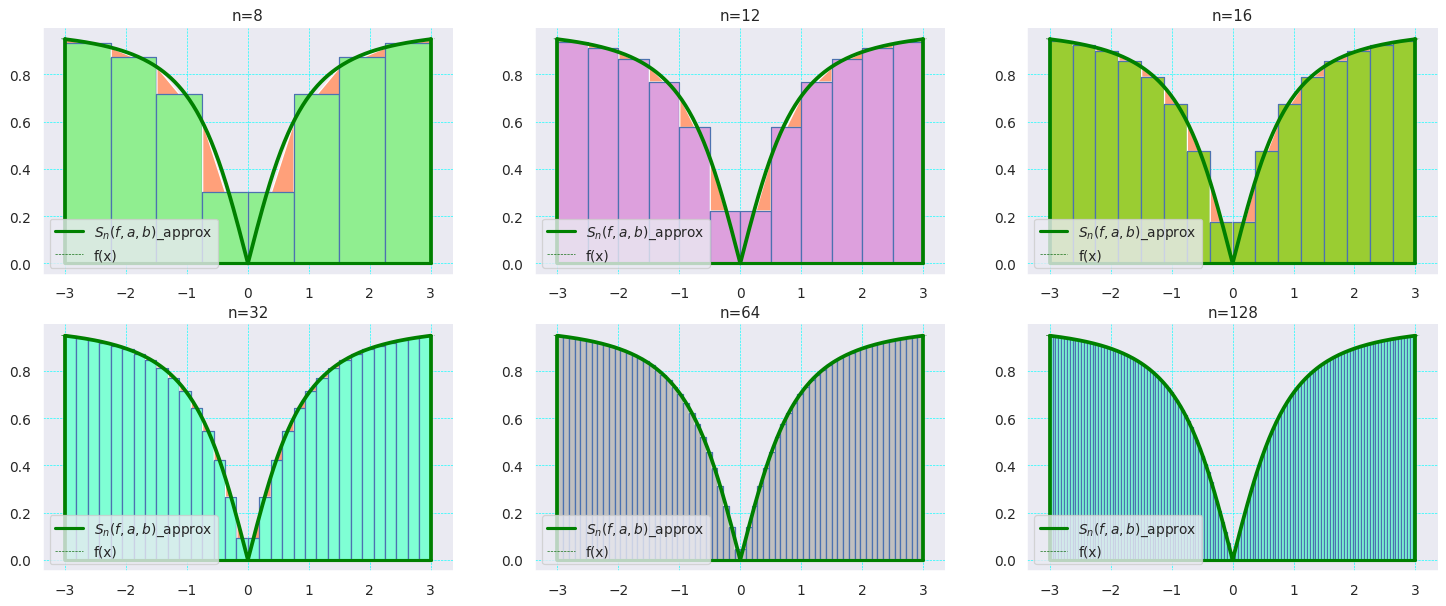

In [5]:
a = -3
b = 3

def fx(x): return abs(x)/np.sqrt(1+x**2)

dvn_aps.loss_integral_Riemann_sum(fx,a, b, 2, 50, '$S = \int_{-3}^3 \dfrac{|x|}{\sqrt{1+x^2}} dx$')    
colors = ["lightgreen", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

## 2. Legendre approximation
### Legendre polynomial
From 

$$ \dfrac{d}{dx} \left[ (1 - x^2) \dfrac{d}{dx} P_n(x) \right] + n(n+1) P_n(x) = 0 $$
where Pn is a polynomial of degree n.

Hence, we have

        P(0,x) = 1
        P(1,x) = x
        P(n,x) = (2*n-1)/n * x * P(n-1,x) - (n-1)/n * P(n-2,x)

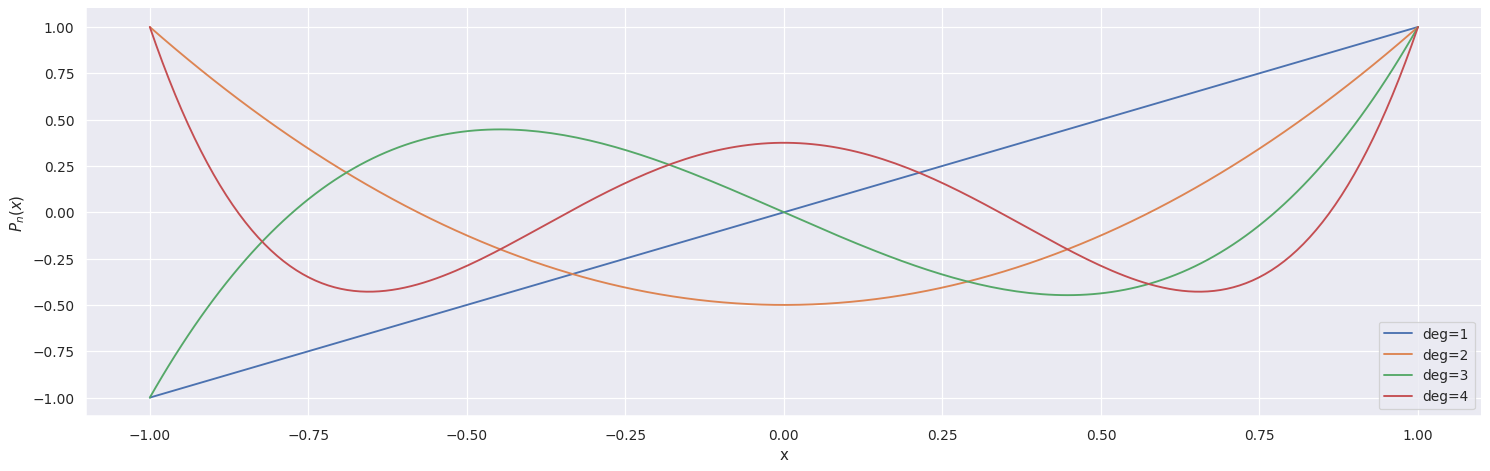

In [6]:
# Creating an array of x values
x = np.linspace(-1, 1, 200) 
plt.figure(figsize = (20, 6), dpi=90)  
for i in range(1, 5):
  
    # Labelling according to order
    plt.plot(x, dvn_aps.Legendre_poly(i, x), label ="deg={}".format(i)) 
    
plt.legend(loc ="best")
plt.xlabel("x")
plt.ylabel("$P_n(x)$")
plt.show()

### Gauss-Legendre approximation results

$$ \int_{a}^b f(t) dt = \int_{-1}^1 \hat{f}(u) du \approx \sum_{k=1}^n w_k \hat{f}(u_k) $$

In [7]:
def fx(x): return np.tanh(x)
a = -2
b = 3
dvn_aps.approx_integral_gauss_legendre(fx, a, b, N_f = 101)

0.9843257572199244

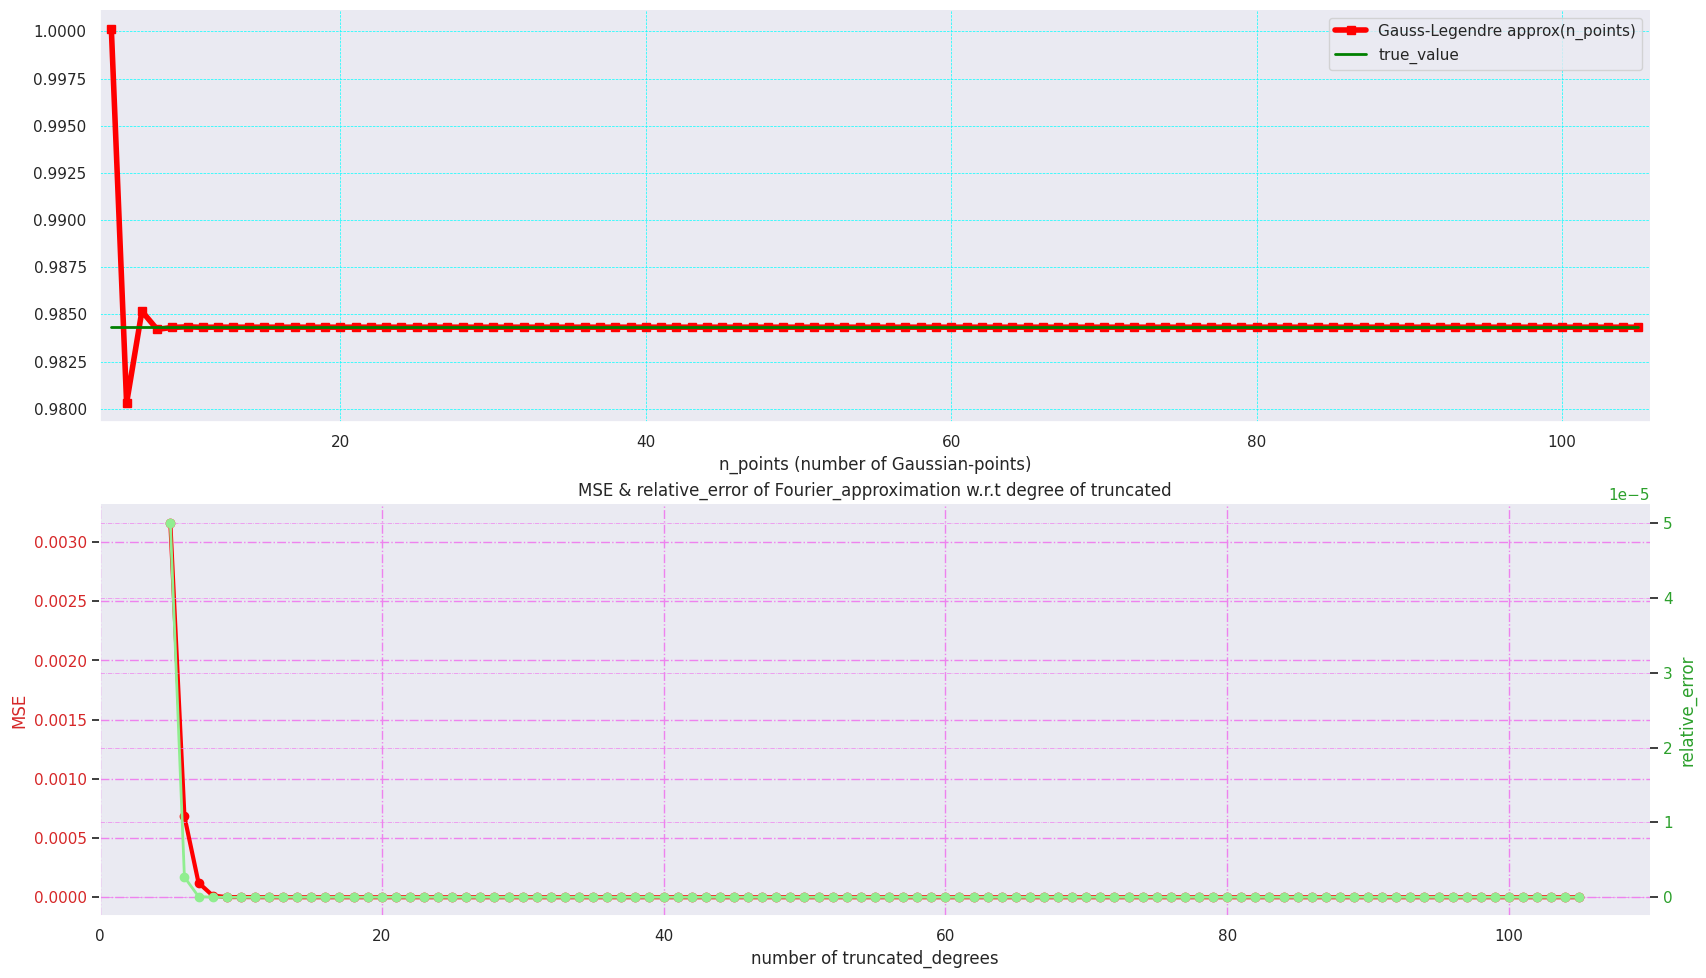

In [8]:
def fx(x): return np.tanh(x)
a = -2
b = 3
nb_pts_min = 5
nb_pts_max = 105    
dvn_aps.gauss_legendre_view_loss(fx, a, b, nb_pts_min, nb_pts_max)

#### Example 2.2.

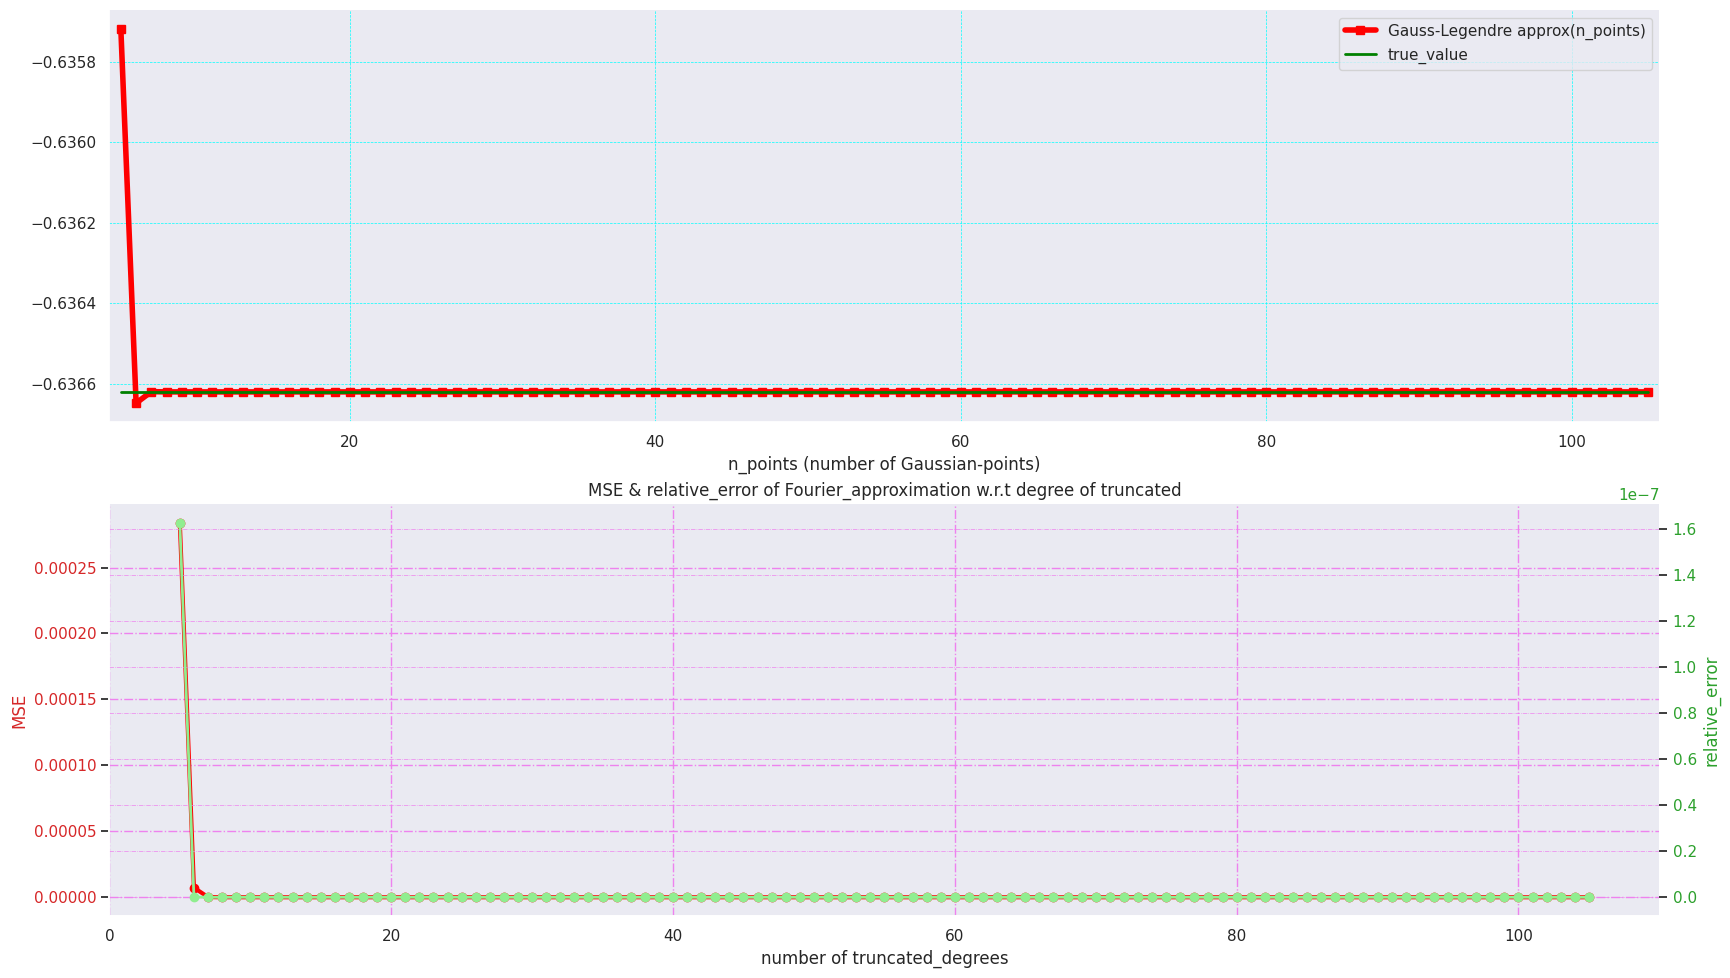

In [9]:
def fx(x): return np.sin(np.pi*x/2)
a = -2
b = 3
nb_pts_min = 5
nb_pts_max = 105    
dvn_aps.gauss_legendre_view_loss(fx, a, b, nb_pts_min, nb_pts_max)

## 3. Simpson approximation